# Introduction to Coding (in Python)
## Lesson 6 - MatPlotLib

### MatPlotLib

Matplotlib is another python library. Hopefully you went ahead and downloaded it at the beginning of Lesson 5. If not, go back there to see how to import a library.

Matplotlib helps us make plots! A common workflow is to do a bunch of calculations with NumPy, then visualize the results with Matplotlib.

Matplotlib and NumPy together make the backbone of scientific coding in Python. We are getting to the point where you will have a skill set useful in various scientific disciplines!

First, we will load the NumPy and MatPlotLib libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Now let's return to the calculus 1 grades:

In [3]:
grades = np.loadtxt("classData.csv",delimiter=',',skiprows=1)

In reality, these are *not* grades. I used the `np.random` sub-library to generate a noisy dataset. Using MatPlotLib, let's see if you can figure out what distributions I used to make the grade dataset. 

Let's plot a histogram for the first test.

**Example 1**

Text(0, 0.5, 'Number of Students')

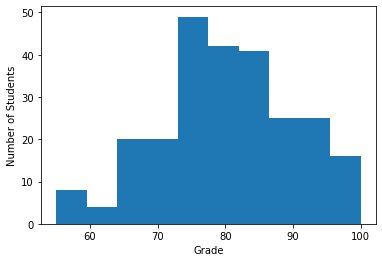

In [98]:
plt.hist(grades[:,0])
plt.xlabel('Grade') #label the x axis
plt.ylabel('Number of Students') # label the y axis

Note the pile up at a grade of 100 - I forced any data points greater than 100 to be 100. (No extra credit for you!). 

In the last lesson, we found the standard deviation and mean of the dataset. For a normal distribution, the probability distribution follows the function 
$$P(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{\frac{-1}{\sigma^2}\left(x - \mu \right)^2 } $$

Let's plot a normal distribution over the histogram and compare them.

**Example 2** 

80.152 9.933020487243546


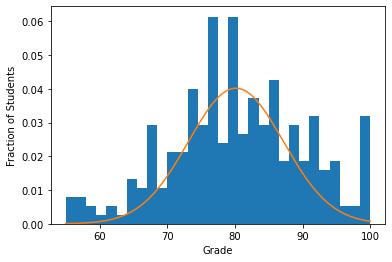

In [103]:
vals, bins, lst = plt.hist(grades[:,0],bins=30,density=True) ##Here, I use 30 bins instead of the default 10
##I also use density - I.e. I divide everything by the total number of students
plt.xlabel('Grade')
plt.ylabel('Fraction of Students')

mu = np.average(grades[:,0]) #Get the mean
stdev = np.std(grades[:,0]) #get the standard deviation
lst = np.linspace(np.min(grades[:,0]),np.max(grades[:,0]),1000) #Make a list of grades, 
# same as cutting up the x-axis into small bins

dist = 1/np.sqrt(2*np.pi*stdev**2)*np.exp(-1/stdev**2*(lst-mu)**2) 
#Plug those small bins into the probability density function

plt.plot(lst,dist) #plot the probability density function
print(mu,stdev)

The data seem close to a normal distribution, especially considering I messed with the grades at the high end. However, I did use a normal distribution with a mean score of 80 and a standard deviation of 10 to make the data! So we got pretty close to the true distribution.

> **Problem 1** \
See if a normal distribution matches the final exam grades (`grades[:,3]`).

You should find that the histogram does not follow the distribution as well. That is because I used a *bimodal* distribution. This can occur when students cheat on an exam! Instead of pulling from a distribution with an average of 75 and standard deviation of 10 for 250 students, I did it for 225 students. Then, I pulled the grades of the final 25 students from a distribution with mean of 95 and standard deviation of 5.

**Example 3**

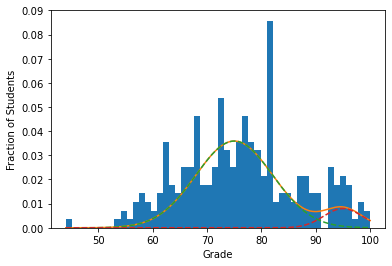

In [151]:
final = grades[:,3]
vals, bins, lst = plt.hist(final,bins=50,density=True)
plt.xlabel('Grade')
plt.ylabel('Fraction of Students')
lst = np.linspace(np.min(final),np.max(final),1000)

mu1 = 75.0
std1 = 10.0
dist1 = 1/np.sqrt(2*np.pi*std1**2)*np.exp(-1/std1**2*(lst-mu1)**2) *225/250

mu2 = 95.0
std2 = 5.0
dist2 = 1/np.sqrt(2*np.pi*std2**2)*np.exp(-1/std2**2*(lst-mu2)**2) *25/250
plt.plot(lst,dist1+dist2)
plt.plot(lst,dist1,'--')
plt.plot(lst,dist2,'--')


See how I used dashed lines to show the two individual distributions? Matplotlib has many other visualization options for data. 

### Visualization

Here I am going to give you some weather data, and hopefully you'll make some pretty plots with it!
First we will load in the data.

**Example 4**

In [195]:
weatherHeader = np.loadtxt('NYC2018.csv',delimiter=',',max_rows=1,dtype=str)
print(weatherHeader[1:4]) ##Print the titles of columsn 1, 2 and 3

#Load columns 1,2,3 
weatherData = np.loadtxt('NYC2018.csv',delimiter=',',skiprows=1,usecols=[1,2,3])

#Load column 0, which is the date
time = np.loadtxt('NYC2018.csv',delimiter=',',skiprows=1,usecols=[0],dtype=np.datetime64)
time = time - np.datetime64(time[0]) #Get a time differential object, by subtracting off the Jan. 1 2018
time = np.array(time,dtype=int)

['tavg' 'tmin' 'tmax']


Now we have data: daily minimum, average, and maximum temperature for the year of 2018. If you print out the final time, you'll notice there are a total of 366 entries - the final data point is for Jan 1st, 2019. 

Go ahead and plot each of the temperatures against time.

>**Problem 2** \
Plot average temperature, minimum temperature, and maximum temperature against time. The average temperature data is given in the first column of the `weatherData` array, i.e. `tavg = weatherData[:,0]`


##### Let's Get Fancy!

For the plot you made, it might be hard to tell which line is which (if you did not know they were minimum, maximum, and average temparture). Let's add a legend!

**Example 5**

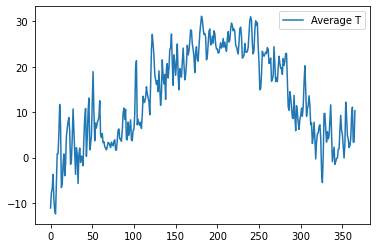

In [196]:
plt.plot(time,weatherData[:,0],label='Average T') #Add a label to the line we plot
plt.legend() #Show all labels and the color of the line associated with them

Also, we can change the color of the line by specifying a `color` parameter:

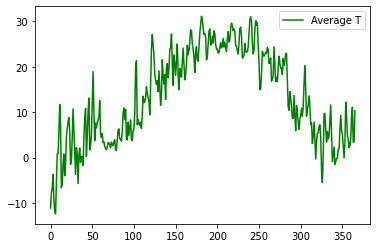

In [197]:
plt.plot(time,weatherData[:,0],color='g',label='Average T') #Add a label to the line we plot
plt.legend() #Show all labels and the color of the line associated with them

Using the color parameter, I changed the line to be green. There are several colors which have specific strings associated with them. For example:

Black  - `'k'`

Blue   - `'b'`

Red    - `'r'`

Green  - `'g'`

Yellow - `'y'`

Cyan   - `'c'`

For other colors, you have to use the Hexidecimal version of the number. 

Hexadecimal is a base-16 number system (instead of the Base-10 you are used to). For colors, hexidecimal codes are given by 6 hexidecimal digits. The digits specify the amount of Red, Green, and Blue in the composite color. 

For example, the following list of Hexidecimal codes gives a list of colors which are colorblind friendly:

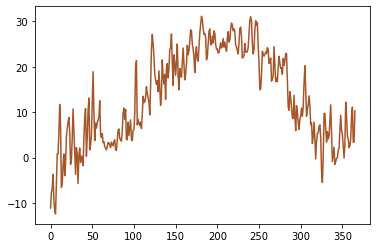

In [198]:
pltColorLst = ['#377eb8','#4daf4a','#a65628',
               '#999999','#984ea3','#ff7f00',
               '#e41a1c','#dede00','#f781bf']
plt.plot(time,weatherData[:,0],color=pltColorLst[2])

>**Problem 3**\
Plot average temperature, maximum temperature, and minimum temperature. Provide a legend, use colorblind-friendly colors, and label the axes. The temperature data is in degrees Fahrenheit.

If you want a really neat label, you can use the LaTeX style math commands `$^\circ \mathrm{F}$` will provide a degree symbol. 

Text(0, 0.5, '$^\\circ \\mathrm{F}$')

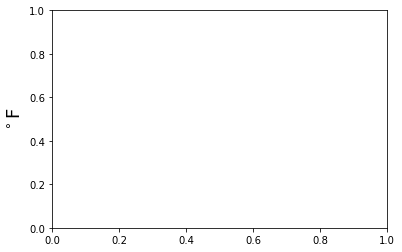

In [204]:
plt.ylabel('$^\circ \mathrm{F}$', fontsize = 18)

Another important consideration is the data points are discontinous. Therefore, we may not want matplotlib to 'connect the dots' for us. To fix that, we can throw in new parameters `marker`, and `linestyle`.


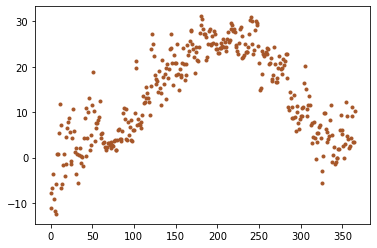

In [200]:
plt.plot(time,weatherData[:,0],marker='.',linestyle='',color=pltColorLst[2])

Notice we passed an empty string to `linestyle`, so there was no line plotted!

This lesson can not teach you everything about plotting with matplotlib. However, if you think of a different way to plot something, the odds are in your favor that someone else already figured out how to do it. Google things like MatPlotLib Error bars and find stackoverflow posts or MatPlotLib documentation which tell you how to do things the way you'd like to!

>**Problem 4**\
Find a matplotlib.pyplot function which allows you to plot errorbars with data. Then, use the max temperature data to define the errorbars around the average temperature.